In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib
from sqlalchemy import create_engine
import scipy.stats as st
from scipy.stats import linregress

In [ ]:
#import freedom
freedom_file = pd.read_csv("freedom.csv")
list(freedom_file.columns)
#pf_expression, Freedom of expression
#ef_legal_protection,Protection of property rights
#ef_legal_integrity, Integrity of the legal system
#pf_identity_sex, Same-sex ralitionships
#pf_religion, Religious freedom
#pf_association_assembly, Freedom of assembly
#ef_trade_movement_visit, Freedom of foreigners to visit
#ef_legal_military, Military interference in rule of law and politics
#ef_money_inflation, Inflation: most recent year
freedom = freedom_file.drop(columns=[
 'hf_score',
 'hf_rank',
 'hf_quartile',
 'pf_rol_procedural',
 'pf_rol_civil',
 'pf_rol_criminal',
 'pf_rol',
 'pf_ss_homicide',
 'pf_ss_disappearances_disap',
 'pf_ss_disappearances_violent',
 'pf_ss_disappearances_organized',
 'pf_ss_disappearances_fatalities',
 'pf_ss_disappearances_injuries',
 'pf_ss_disappearances',
 'pf_ss_women_fgm',
 'pf_ss_women_inheritance_widows',
 'pf_ss_women_inheritance_daughters',
 'pf_ss_women_inheritance',
 'pf_ss_women',
 'pf_ss',
 'pf_movement_domestic',
 'pf_movement_foreign',
 'pf_movement_women',
 'pf_movement',
 'pf_religion_estop_establish',
 'pf_religion_estop_operate',
 'pf_religion_estop',
 'pf_religion_harassment',
 'pf_religion_restrictions',
 'pf_association_association',
 'pf_association_political_establish',
 'pf_association_political_operate',
 'pf_association_political',
 'pf_association_prof_establish',
 'pf_association_prof_operate',
 'pf_association_prof',
 'pf_association_sport_establish',
 'pf_association_sport_operate',
 'pf_association_sport',
 'pf_association',
 'pf_expression_killed',
 'pf_expression_jailed',
 'pf_expression_influence',
 'pf_expression_control',
 'pf_expression_cable',
 'pf_expression_newspapers',
 'pf_expression_internet',
 'pf_identity_legal',
 'pf_identity_sex_male',
 'pf_identity_sex_female',
 'pf_identity_divorce',
 'pf_identity',
 'pf_score',
 'pf_rank',
 'ef_government_consumption',
 'ef_government_transfers',
 'ef_government_enterprises',
 'ef_government_tax_income',
 'ef_government_tax_payroll',
 'ef_government_tax',
 'ef_government_soa',
 'ef_government',
 'ef_legal_judicial',
 'ef_legal_courts',
 'ef_legal_enforcement',
 'ef_legal_restrictions',
 'ef_legal_police',
 'ef_legal_crime',
 'ef_legal_gender',
 'ef_legal',
 'ef_money_growth',
 'ef_money_sd',
 'ef_money_currency',
 'ef_money',
 'ef_trade_tariffs_revenue',
 'ef_trade_tariffs_mean',
 'ef_trade_tariffs_sd',
 'ef_trade_tariffs',
 'ef_trade_regulatory_nontariff',
 'ef_trade_regulatory_compliance',
 'ef_trade_regulatory',
 'ef_trade_black',
 'ef_trade_movement_foreign',
 'ef_trade_movement_capital',
 'ef_trade_movement',
 'ef_trade',
 'ef_regulation_credit_ownership',
 'ef_regulation_credit_private',
 'ef_regulation_credit_interest',
 'ef_regulation_credit',
 'ef_regulation_labor_minwage',
 'ef_regulation_labor_firing',
 'ef_regulation_labor_bargain',
 'ef_regulation_labor_hours',
 'ef_regulation_labor_dismissal',
 'ef_regulation_labor_conscription',
 'ef_regulation_labor',
 'ef_regulation_business_adm',
 'ef_regulation_business_bureaucracy',
 'ef_regulation_business_start',
 'ef_regulation_business_bribes',
 'ef_regulation_business_licensing',
 'ef_regulation_business_compliance',
 'ef_regulation_business',
 'ef_regulation',
 'ef_score',
 'ef_rank'])

#change columns name
freedom_new = freedom.rename(columns={"ISO_code":"code","pf_religion":"religion","pf_association_assembly":"assembly",
                                     "pf_expression":"expression","pf_identity_sex":"same sex",
                                     "ef_legal_protection":"legal protection","ef_legal_military":"military interference",
                                     "ef_legal_integrity":"legal system","ef_money_inflation":"inflation",
                                     "ef_trade_movement_visit":"foreigners visit"})
freedom_new.dtypes
freedom_new.head()

In [ ]:
#import happiness
happiness_file = pd.read_csv("happiness.csv")
list(happiness_file.columns)
happiness_new = happiness_file.rename(columns={'Entity':"countries",'Code':'code','Year':'year',
                                               'World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))':'happiness score'})
happiness_new.dtypes
happiness_new.head()

In [ ]:
#merge on'code'
merge_table = pd.merge(happiness_new,freedom_new,how="left",left_on=["code","year"],right_on=["code","year"])
merge_new = merge_table.drop(columns=['countries_y'])

#drop NA
merge_new = merge_new.dropna()
merge_new = merge_new.rename(columns={'countries_x':'countries'})

merge_new 

In [ ]:
#countries table
countries = merge_new[['countries','code','region']]
country = countries.groupby('code')
country = country.first()
country.sort_values('code')

In [ ]:
#variable
variable = merge_new[['code','year','happiness score','religion','assembly','expression','same sex',
                      'legal protection','military interference','legal system','inflation','foreigners visit']]
variable = merge_new.rename(columns={'happiness score':'happiness_score','same sex':'same_sex',
                                 'legal protection':'legal_protection','military interference':'military_interference',
                                 'legal system':'legal_system','foreigners visit':'foreigners_visit'})
variable = variable.drop(columns=['countries','region'])
#values = variable.groupby('code')
#values=values.all()
values = variable.replace('-', 'NA')
values

In [ ]:
#Create database connection
connection_string = "postgres:postgres@localhost:5432/ETL_homework"
engine = create_engine(f'postgresql://{connection_string}')

# Confirm tables
engine.table_names()

In [ ]:
engine.execute('DROP TABLE IF EXISTS country;')
engine.execute('DROP TABLE IF EXISTS values;')

In [ ]:
country.to_sql(name='country', con=engine, if_exists='append', index=True)
values.to_sql(name='values', con=engine, if_exists='append', index=True)

In [ ]:
merge_new

In [ ]:
merge_new=merge_new.replace('-',np.nan)

d ={'religion':float,'assembly':float,'expression':float,'same sex':float,'legal protection':float,
    'military interference':float,'legal system':float,'inflation':float,'foreigners visit':float,}

new_df = merge_new.astype(d)
new_df.dtypes
table = new_df.groupby(['code'])
table = table.mean()
average_happiness = table['happiness score']
average_freedom = table[['religion','assembly','expression','same sex','legal protection',
                         'military interference','legal system','inflation','foreigners visit']].mean(axis=1)
                        
type(average_happiness)


In [ ]:
#create a table
df1 = average_happiness.to_frame().reset_index()
df2 = average_freedom.to_frame().reset_index()
free_to_happy = df1.merge(df2)
free_to_happy = free_to_happy.rename(columns={'0':'freedom'})
free_to_happy

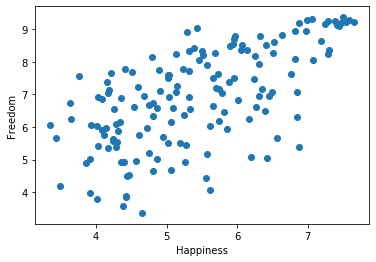

In [16]:
#create graphic
happiness =free_to_happy.iloc[:,1]
freedom= free_to_happy.iloc[:,2]
plt.scatter(happiness,freedom)
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.show()


In [17]:
correlation = st.pearsonr(happiness,freedom)
print(f"The correlation coefficient between happiness and freedom is {round(correlation[0],2)}")

The correlation coefficient between happiness and freedom is 0.63
